In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# # Getting our data ready to be used with machine learning
Three mian things we have to do:
    1.split the data into features and labels(usually 'X','Y')
    2.Filling( also called imputing) or disregarding missing values
    3.Converting non numerical values to numerical values(features encoding)

In [2]:
heart_diseases=pd.read_csv('Data/heart-disease.csv')
heart_diseases

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_diseases.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
x=heart_diseases.drop('target',axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y=heart_diseases['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
# split the data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [8]:
x.shape

(303, 13)

In [9]:
len(heart_diseases)

303

In [10]:
x.shape[0]*0.8

242.4

# 1.1 Make sure  its all arem numerical

In [11]:
car_sales=pd.read_csv('Data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [12]:
len(car_sales)

1000

In [13]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [14]:
# split into x/y
x=car_sales.drop('Price',axis=1)
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [15]:
y=car_sales['Price']
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score

ValueError: could not convert string to float: 'BMW'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=['Make','Colour',"Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x=transformer.fit_transform(x)
transformed_x

In [ ]:
pd.DataFrame(transformed_x)

In [ ]:
dummies=pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

In [ ]:
# let's fit the model
np.random.seed(40)
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

# what if there were missing values?
1.Fill them with some value (known as imputation)
2.Remove the sample with missing data together


In [18]:
# import car sales missing data
car_sales_missing=pd.read_csv('Data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [19]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [20]:
# create x and y
x=car_sales_missing.drop('Price',axis=1)
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [21]:
y=car_sales_missing['Price']
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 1000, dtype: float64

In [22]:
# let's try and convert our data to numbers
#Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=['Make',"Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x=transformer.fit_transform(x)
transformed_x

ValueError: Input contains NaN

In [ ]:
car_sales_missing

In [23]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

# option 1: Fill missing with pandas


In [24]:
# Fill the make column
car_sales_missing['Make'].fillna('missing',inplace=True)

# Fill the colour column
car_sales_missing['Colour'].fillna('missing',inplace=True)

# Fill the Odometer(KM) column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

#Fill the Doors column
car_sales_missing['Doors'].fillna(4,inplace=True)

In [25]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [26]:
# remove rows with missing price values

In [27]:
car_sales_missing.dropna(inplace=True)

In [28]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [29]:
len(car_sales_missing)

950

In [30]:
x=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=['Make','Colour',"Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x=transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [32]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


# option 2: Handling missing value using scikit learn

In [33]:
car_missing=pd.read_csv('Data/car-sales-extended-missing-data.csv')
car_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [34]:
car_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [35]:
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
# Drop the rows with no labels
car_missing.dropna(subset=['Price'],inplace=True)
car_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [37]:
# split into x and y
x=car_missing.drop("Price",axis=1)
y=car_missing["Price"]

In [38]:
# Fill missing value with scikit
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical value with missing and numerical value with mean
cat_imputer= SimpleImputer(strategy='constant',fill_value='missing')
door_imputer= SimpleImputer(strategy='constant',fill_value=4)
num_imputer=SimpleImputer(strategy='mean')

#define columns
cat_features=['Make','Colour']
door_features=['Doors']
num_features=['Odometer (KM)']

#define imputer
imputer = ColumnTransformer([('cat_imputer',cat_imputer,cat_features),
                             ('door_imputer',door_imputer,door_features),
                            ('num_imputer',num_imputer,num_features)])

# transform the data
filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [39]:
car_sales_filled=pd.DataFrame(filled_x,columns=['Make','Colour','Doors','Odometer (KM)'] )
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [40]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [41]:
# let's try and convert our data to numbers
#Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=['Make',"Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x=transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [42]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

## 2. choosing the right estimator/algorithm for our problem
Scikit learn uses estimator as another term for machine learning model or algorithm.
*classification - predicting whether a sample is one thing or another thing.
*Regression - predicting a number`


### 2.1 Picking a machine learning model for a regression problem.


In [43]:
# import Boston housing dataset
from sklearn.datasets import load_boston
boston=load_boston()
boston;

In [44]:
boston_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [45]:
len(boston_df)

506

In [46]:
# Let's try the ridge regression model
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

#Create the data
x=boston_df.drop('target',axis=1)
y=boston_df['target']

#split into train and test sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# instantiate Ridge model
model=Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6662221670168522

 # How do we improve this score ?
    What if Ridge wasn't working?

In [47]:
# let's try the random forest regressor

from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# Create the data

x=boston_df.drop('target',axis=1)
y=boston_df['target']

# split the data

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

#Instantiate random forest regressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

#Evaluate the random forest regressor
rf.score(x_test,y_test)
 

0.873969014117403

In [48]:
model.score(x_test,y_test)

0.6662221670168522

In [49]:
# 2.2 Choosing an estimator for a classification problem 
hd=pd.read_csv('Data/heart-disease.csv ')
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [50]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
  len(hd)

303

# Consulting the map and it says to try linearSVC

In [52]:
heart_dis=pd.read_csv('Data/heart-disease.csv')
heart_dis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [53]:
# import the linearSVC estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# Make the data
x=hd.drop('target',axis=1)
y=hd['target']

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate linearSVC
clf=LinearSVC(max_iter=100000)
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)



C:\Users\ABDULLAH\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8852459016393442

In [54]:
hd['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [55]:
# import the linearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Make the data
x=hd.drop('target',axis=1)
y=hd['target']

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate linearSVC
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)


0.8524590163934426

## 3. Fit the model/algorithm on our data and use it to make predictions
### 3.1 Fitting the model to the data
* 'x'= features,features variables,data
* 'y'= labels, targets, target variables

In [56]:
# import the linearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Make the data
x=hd.drop('target',axis=1)
y=hd['target']

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate linearSVC
clf=RandomForestClassifier()

# Fit the data training the machine learning
clf.fit(x_train,y_train)

# Evaluate the LinearSVC(use the patterns the model has learned)
clf.score(x_test,y_test)

0.8524590163934426

In [57]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [58]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# 3.2  Make a prediction using a machine learning model

2 ways to make predictions:
1. predict()
2. predict_proba()

In [59]:
# use a trained model to make prediction
clf.predict(np.array([1,7,8,3,4])) # this doesn't work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
x_test

In [ ]:
x_test.head()

In [ ]:
clf.predict(x_test)

In [ ]:
y_test

In [ ]:
np.array([y_test])

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_preds= clf.predict(x_test)
np.mean(y_preds ==y_test)

In [ ]:
clf.score(x_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

# Make prediction with predict_proba()

In [ ]:
# predict_proba() returns probabilities 
clf.predict_proba(x_test[:5])

In [ ]:
# let's predict on the same data
clf.predict(x_test[:5])

In [ ]:
x_test[:5]

'Predict()' can also be used for regression models

In [60]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x=boston_df.drop('target',axis=1)
y=boston_df['target']

#split into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model
model=RandomForestRegressor(n_estimators=100).fit(x_train,y_train)

# make the predictions
y_preds=model.predict(x_test)

In [61]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [62]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [63]:
# compaare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.1226372549019623

# # Evaluating machine learning model

Three ways to evaluate scikit learn models/estimators
* 1.Estimator 'score' method
* 2.The scoring parametet
* 3.Problem specific metric functions

### 4.1 Evaluating a model with score method

In [64]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=hd.drop('target',axis=1)
y=hd['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
clf.score(x_train,y_train)

1.0

In [66]:
clf.score(x_test,y_ test)

SyntaxError: invalid syntax (<ipython-input-66-51a06c15c2dc>, line 1)

# let's do the same but for regression...

In [67]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=boston_df.drop('target',axis=1)
y=boston_df['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestRegressor (n_estimators=100)
clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
clf.score(x_train,y_train)

0.976679849361528

In [69]:
clf.score(x_test,y_test)

0.873969014117403

### 4.1 Evaluating a model with scoring parameter

In [70]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=hd.drop('target',axis=1)
y=hd['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
clf.score(x_test,y_test)

0.8524590163934426

In [72]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [73]:
np.random.seed(42)

#single training and test split score
clf_single_score=clf.score(x_test,y_test)

# Take the mean of 5-fold cross validation score
clf_cross_val_score=np.mean(cross_val_score(clf,x,y,cv=3))

#compare the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8316831683168316)

In [74]:
# scoring parameter set to None by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.81967213, 0.8852459 , 0.80327869, 0.81666667, 0.78333333])

# 4.2.1 classification model evaluation matrics
* 1.Accuracy
* 2.Area under ROC curve
* 3.Confusion metrics
* 4.classification metrics

In [75]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd['target']

clf=RandomForestClassifier(n_estimators=100)
cross_val_score=cross_val_score(clf,x,y,cv=5)


In [77]:
np.mean(cross_val_score)

0.8248087431693989

In [78]:
 print(f'Heart Disease classifier cross-validated accuracy: {np.mean(cross_val_score) *100:.2f}')

Heart Disease classifier cross-validated accuracy: 82.48


**Area under the receiver operating characterstics curve(AUC/ROC)**

* Area under curve(AUC)
* ROC curve

Roc curves are a comparison of a model's true positive rate(tpr) verses
 a models false positive rate (fpr)
 
* True positive = model predicts 1 when truth is 1
* False positve = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1
 

In [79]:
# Create the test

x_train , x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

In [80]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train,y_train)

# Make predictions with  probabilities
y_probs=clf.predict_proba(x_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [81]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [82]:
# calculate fpr,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

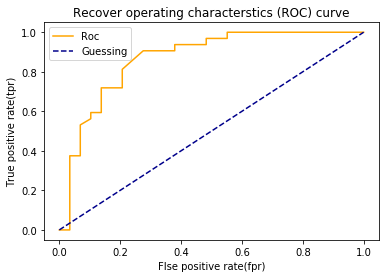

In [83]:
# create a function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    
    
    # plot the curve
    plt.plot(fpr,tpr,color='orange',label='Roc')
    
    #plot lines with no predictive power(baseline)
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')
    
    # customize the plot
    plt.xlabel('Flse positive rate(fpr)')
    plt.ylabel('True positive rate(tpr)')
    plt.title('Recover operating characterstics (ROC) curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [84]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

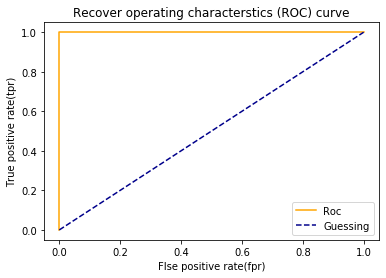

In [85]:
# create the perfect ROC curve and AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [86]:
# perfect auc score
roc_auc_score(y_test,y_test)

1.0

***Confusion matrix***
 A confuision matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused

In [87]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(x_test)

confusion_matrix(y_test,y_preds)


array([[23,  6],
       [ 6, 26]], dtype=int64)

In [88]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=['Actual labels'],
colnames=['Predicted labels'])

Predicted labels,0,1
Actual labels,,
0,23,6
1,6,26


In [89]:
len(x_test)

61

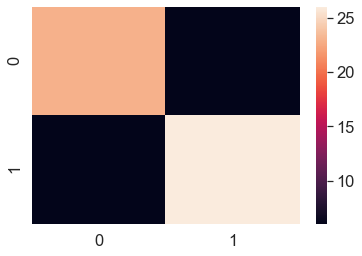

In [90]:
# Make our confusion matrix more visual with Seaborns heatmap()

import seaborn as ss

# set the font scale
    
ss.set(font_scale=1.5)


# Create a confuision matrix
conf_mat=confusion_matrix(y_test,y_preds)

#plot it using seaborn

ss.heatmap(conf_mat)

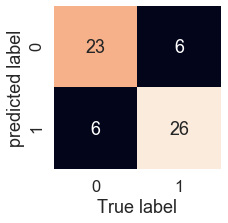

In [91]:
def plot_conf_mat(conf_mat):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=ss.heatmap(conf_mat,annot=True,cbar=False)
    plt.xlabel('True label')
    plt.ylabel('predicted label')
    
plot_conf_mat(conf_mat)

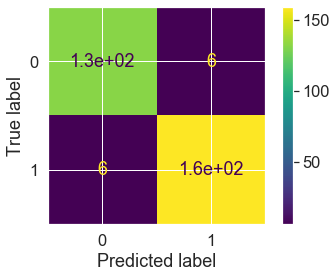

In [92]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,x,y)

# classification report


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



# 4.2.2 Evaluating regression model
Model evaluation metrics documentation 
* 1.R^2(pronounced r-squared) or coefficient of determination
* 2.Mean absolute error(MAE)
* 3.Mean squared error(MSE)


In [94]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=boston_df.drop('target',axis=1)
y=boston_df['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train);

In [95]:
model.score(x_test,y_test)

0.873969014117403

In [96]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean=np.full(len(y_test), y_test.mean())

In [97]:
y_test.mean()

21.488235294117654

In [98]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [99]:
r2_score(y_test,y_test_mean)

2.220446049250313e-16

In [100]:
 r2_score(y_test,y_test)

1.0

# Mean absolute error

In [101]:
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

In [102]:
df=pd.DataFrame(data={'actual values':y_test,'predicted values':y_preds})
df['difference']=df['predicted values']-df['actual values']
df

,actual values,predicted values,difference
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


 # Mean squared error(MSE)


In [103]:
from sklearn.metrics import mean_squared_error

y_preds=model.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

9.242328990196082

In [104]:
# calculate mse by hand
sqaured=np.square(df['difference'])
sqaured.mean()

9.24232899019608

# Finally using the scoring parameter


In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(34)

x=hd.drop('target',axis=1)
y=hd['target']

clf=RandomForestClassifier(n_estimators=100)


In [106]:
np.random.seed(34)
cv_acc=cross_val_score(clf,x,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.81967213, 0.81666667, 0.78333333])

In [107]:
# Cross validated acuracy
print(f'The cross validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

The cross validated accuracy is:82.82%


In [108]:
np.random.seed(34)
cv_acc=cross_val_score(clf,x,y,cv=5,scoring=None)
print(f'The cross validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

The cross validated accuracy is:82.82%


In [109]:
# precision
cv_precision=cross_val_score(clf,x,y,cv=5,scoring='precision')
np.mean(cv_precision)

0.8380074092574092

In [110]:
# recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring='recall')
np.mean(cv_recall)

0.8545454545454545

In [111]:
 # F1 score
cv_f1=cross_val_score(clf,x,y,cv=5,scoring='f1')
np.mean(cv_f1)

0.8313960500527665

# How about our regresion model?


In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=boston_df.drop('target',axis=1)
y=boston_df['target']

model=RandomForestRegressor(n_estimators=100)


In [113]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,cv=5,scoring=None)
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [114]:
np.mean(cv_r2)

0.622375083951403

In [115]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,cv=5,scoring='r2')
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [116]:
np.mean(cv_r2)

0.622375083951403

In [117]:
# Mean absolute error
np.random.seed(42)
cv_mae=cross_val_score(model,x,y,cv=5,scoring='neg_mean_absolute_error')
cv_mae

array([-2.12870588, -2.58823762, -3.3420198 , -3.75555446, -3.34263366])

In [118]:
# Mean squared error
cv_mse=cross_val_score(model,x,y,cv=5,scoring='neg_mean_squared_error')
cv_mse

array([ -8.01838044, -12.61091685, -21.54483678, -46.76084033,
       -17.9075795 ])

In [119]:
np.mean(cv_mse)

-21.368510781304586

### 4.3 Using different evolution metrics as scikit learn functions

Classification evalution functions


In [120]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x=hd.drop('target',axis=1)
y=hd['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

y_preds=clf.predict(x_test)

# Evaluate the classifier
print('Classifier metrics on the test set')
print(f'Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%')
print(f'Precision:{precision_score(y_test,y_preds)}')
print(f'Recall:{recall_score(y_test,y_preds)}')
print(f'F1:{f1_score(y_test,y_preds)}')

Classifier metrics on the test set
Accuracy:85.25%
Precision:0.8484848484848485
Recall:0.875
F1:0.8615384615384615


# Regression evaluation functions

In [124]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
 
np.random.seed(42)

x=hd.drop('target',axis=1)
y=hd['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)

model.fit(x_train,y_train)

y_preds=model.predict(x_test)

# Evaluate the regression model
print('Regression model metrics on the test set')
print(f'R^2:{r2_score(y_test,y_preds)}')
print(f'MAE:{mean_absolute_error(y_test,y_preds)}')
print(f'MSE:{mean_squared_error(y_test,y_preds)}')


Regression model metrics on the test set
R^2:0.5106393318965518
MAE:0.23754098360655734
MSE:0.12204426229508197
